In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("extracted_text2.csv")

In [3]:
df1.head()

,Paragraph
0,Machine Learning Tom M. Mitchell Product De...
1,PREFACE The field of machine learning is conc...
2,xvi PREFACE A third principle that guided the ...
3,"PREFACE xvii Joachim, Atsushi Kawamura, Martin..."
4,CHAPTER INTRODUCTION Ever since computers wer...


In [4]:
df1["Paragraph"].count()

412

In [5]:
df1['Category'] = df1['Paragraph'].apply(lambda x: 'Machine Learning Basics' if 'machine learning' in x.lower()
                                      else ('Decision Trees' if 'decision tree' in x.lower()
                                            else ('Neural Networks' if 'neural networks' in x.lower()
                                                  else ('Bayesian Learning' if 'bayesian' in x.lower()
                                                        else 'Reinforcement Learning'))))

In [7]:
df1["Category"].head()

0    Machine Learning Basics
1    Machine Learning Basics
2    Machine Learning Basics
3     Reinforcement Learning
4    Machine Learning Basics
Name: Category, dtype: object

In [8]:
x = df1["Paragraph"]
y = df1["Category"]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
# Step 4: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Step 6: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

      Bayesian Learning       0.50      0.25      0.33         4
         Decision Trees       0.82      0.56      0.67        16
Machine Learning Basics       0.79      0.65      0.71        23
        Neural Networks       0.00      0.00      0.00         3
 Reinforcement Learning       0.66      0.89      0.76        37

               accuracy                           0.70        83
              macro avg       0.55      0.47      0.49        83
           weighted avg       0.69      0.70      0.68        83



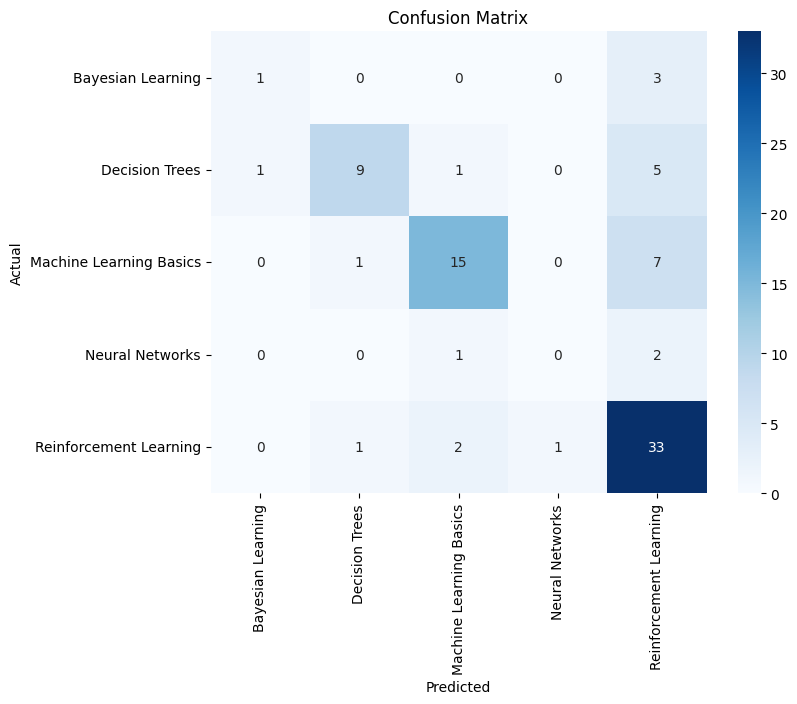

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Some questions to classify
new_questions = [
    "What is deep learning?",
    "How does a decision tree work?",
    "What are the key concepts of reinforcement learning?",
    "Explain the concept of a neural network.",
    "What is Bayes' rule used for?"
]

# Transform the new questions using the same vectorizer
new_questions_transformed = vectorizer.transform(new_questions)

# Predict the categories for the new questions
predictions = model.predict(new_questions_transformed)

# Display predictions
for question, prediction in zip(new_questions, predictions):
    print(f"Question: {question}\nPredicted Category: {prediction}\n")

Question: What is deep learning?
Predicted Category: Reinforcement Learning

Question: How does a decision tree work?
Predicted Category: Decision Trees

Question: What are the key concepts of reinforcement learning?
Predicted Category: Machine Learning Basics

Question: Explain the concept of a neural network.
Predicted Category: Machine Learning Basics

Question: What is Bayes' rule used for?
Predicted Category: Machine Learning Basics

